<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/80x15.png" /></a><div align="center">This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.</div>

----

# Preparing the environment

## Graphics and plotting

In [2]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of opening a new window for each figure. 
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# general graphics settings
matplotlib.rcParams['figure.figsize'] = (10, 7)

In [3]:
import seaborn as sea

sea.set_style('dark')

In [4]:
import numpy as np

## SQL database connection

Before we can use the `%sql` syntax, two steps must be taken:

* Load the IPython-SQL bridge code:

In [5]:
%load_ext sql

* Connect to an actual database; this must be the first `%sql` statement; we connect to the PostGreSQL DB named `s_cerevisiae` running on *this* host (shortcut: the null string after the `@` sign) as user `ubuntu`:

In [6]:
%sql postgresql://rmurri@/s_cerevisiae

u'Connected: rmurri@s_cerevisiae'

# Introduction to the `networkx` library

The `y2h_union` table lists interacting proteins (by name); a pair *(proteinA, proteinB)* appears in the table if *proteinA* interacts with *proteinB*.  Note that the "interacts with" relation need not be symmetric!

This describes a *directed* graph, where the proteins are the vertices and each interaction defines an edge.

Let us have a look at the `y2h_union` table:

In [7]:
%sql select * from y2h_union limit 3;

3 rows affected.


symbol_a,symbol_b
Q0085,YCR106W
TORF1,YCR106W
TORF19,YDR361C


In [8]:
data = %sql select * from y2h_union;

2929 rows affected.


In [9]:
data[:3]

[(u'Q0085', u'YCR106W'), (u'TORF1', u'YCR106W'), (u'TORF19', u'YDR361C')]

Alternatively, one can load the data from the `Y2H_union.tsv` file using only Python functions:

In [10]:
data = []
with open('Y2H_union.tsv', 'r') as stream:
    for line in stream:
        data.append(line.split())

In [11]:
data[:3]

[['MEL1', 'YJL092W'], ['Q0085', 'YCR106W'], ['TORF1', 'YCR106W']]

## Graph and network analysis with `networkx`

Python package [`networkx`](http://networkx.readthedocs.io/en/networkx-1.11/index.html) provides convenient functions to create a graph (directed or undirected) from a set of nodes or edges, and then [perform common graph-theoretical operations on it](http://networkx.readthedocs.io/en/networkx-1.11/reference/algorithms.html), including computing a number of invariants.

However, `networkx` online reference, albeit quite comprehensive, does not document all available features. Python's `help()` command is your friend.

In [12]:
import networkx as nx

An *undirected* graph is built by calling the object constructor `networkx.Graph()` (use `networkx.DiGraph()` for a *directed* graph).  A graph is initially empty, edges and vertices must be added later on.

In [13]:
G = nx.Graph()

Each edge is defined by the pair of end vertices (order matters in the case of directed graphs).  Method `add_edges_from()` takes a list of vertex pairs and adds the corresponding vertices to the graph; vertices are added too, as needed.

In [14]:
G.add_edges_from(data)

The `.nodes()` method returns a list of graph vertices:

In [15]:
ns = G.nodes()

In [16]:
len(ns)

2018

Note that graph vertices can be *any* Python objects (with a few restrictions like not using a graph or a part of its data structures as a vertex of itself).

In [17]:
ns[:5]

['YLR268W', 'YJL155C', 'YBR255W', 'YFR027W', 'YJR122W']

`networkx` also provides a [few drawing functions](http://networkx.readthedocs.io/en/networkx-1.11/reference/drawing.html) but "its main goal is to enable graph analysis rather than perform graph visualization. In the future, graph visualization functionality may be removed from NetworkX or only available as an add-on package."  Indeed, the basic `Graph.draw()` method ignores the currently-set Matplotlib style and does not allow any customization.  As recommended by `networkx` documentation, it is better to export the graph data and use a specialized visualization tool (e.g., [Graphviz](http://www.graphviz.org/)).

/opt/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/opt/anaconda2/lib/python2.7/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/opt/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/opt/anaconda2/lib/python2.7/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in

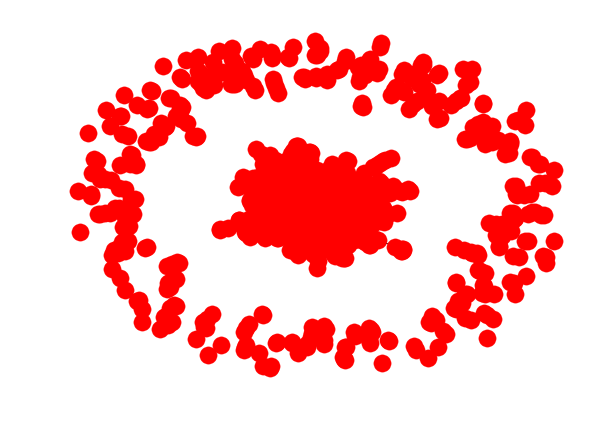

In [18]:
nx.draw(G)

### Computing graph invariants

#### Vertex degrees

`networkx` already provides functions for computing the (total, in-, or out-) degree of a vertex.  (In-degree and out-degree do of course only make sense for *directed* graphs.)

In [19]:
help(G.degree)

Help on method degree in module networkx.classes.graph:

degree(self, nbunch=None, weight=None) method of networkx.classes.graph.Graph instance
    Return the degree of a node or nodes.
    
    The node degree is the number of edges adjacent to that node.
    
    Parameters
    ----------
    nbunch : iterable container, optional (default=all nodes)
        A container of nodes.  The container will be iterated
        through once.
    
    weight : string or None, optional (default=None)
       The edge attribute that holds the numerical value used
       as a weight.  If None, then each edge has weight 1.
       The degree is the sum of the edge weights adjacent to the node.
    
    Returns
    -------
    nd : dictionary, or number
        A dictionary with nodes as keys and degree as values or
        a number if a single node is specified.
    
    Examples
    --------
    >>> G = nx.Graph()   # or DiGraph, MultiGraph, MultiDiGraph, etc
    >>> G.add_path([0,1,2,3])
    >>> G.

In [20]:
G.degree(u'YLR268W')

4

In- and out-degrees are only defined for *directed* graphs.

In [21]:
G.in_degree(u'YLR268W')

AttributeError: 'Graph' object has no attribute 'in_degree'

Note that **the return value of `.degree()` changes when passed a list of vertices** instead of just one.  This behavior is common to many `networkx` functions.

In [22]:
G.degree(['YLR268W', 'MEL1'])

{'MEL1': 1, 'YLR268W': 4}

Let us define a function to compute the average of the values returned by `networkx` functions. It comes in handy for computing some whole-graph quantities.

In [23]:
def avg(result):
    values = list(result.values())
    return sum(values) / len(values)

In [24]:
avg(G.degree(G.nodes()))

2

Let us package the procedure in a ready-to-use function.

In [25]:
def average_degree(G):
    """
    Return the average vertex degree of graph `G`.
    """
    return avg(G.degree(G.nodes()))

#### Vertex degree distribution

Seaborn's function [`distplot`](http://seaborn.pydata.org/generated/seaborn.distplot.html) can be used to plot the distribution of a bag of numbers. We need to extract the list of vertex degrees, i.e., the values in the mapping returned by `G.degree()`, to pass to `distplot`.  Also note that the list of degrees may include `0`, in case there are vertices not connected to any other node in the graph.

In [26]:
def plot_degree_distribution(G):
    nodes = G.nodes()
    node_to_degree_map = G.degree(nodes)
    degrees = list(node_to_degree_map.values())
    sea.distplot(degrees)

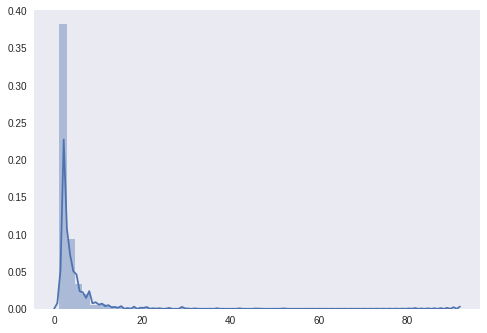

In [27]:
plot_degree_distribution(G)

#### Clustering coefficient

The `networkx.clustering` function returns the clustering coefficient of all vertices (by default) or a specified set of vertices (if explicitly given).

In [28]:
help(nx.clustering)

Help on function clustering in module networkx.algorithms.cluster:

clustering(G, nodes=None, weight=None)
    Compute the clustering coefficient for nodes.
    
    For unweighted graphs, the clustering of a node `u`
    is the fraction of possible triangles through that node that exist,
    
    .. math::
    
      c_u = \frac{2 T(u)}{deg(u)(deg(u)-1)},
    
    where `T(u)` is the number of triangles through node `u` and
    `deg(u)` is the degree of `u`.
    
    For weighted graphs, the clustering is defined
    as the geometric average of the subgraph edge weights [1]_,
    
    .. math::
    
       c_u = \frac{1}{deg(u)(deg(u)-1))}
            \sum_{uv} (\hat{w}_{uv} \hat{w}_{uw} \hat{w}_{vw})^{1/3}.
      
    The edge weights `\hat{w}_{uv}` are normalized by the maximum weight in the
    network `\hat{w}_{uv} = w_{uv}/\max(w)`.
    
    The value of `c_u` is assigned to 0 if `deg(u) < 2`.
    
    Parameters
    ----------
    G : graph
    
    nodes : container of nodes, o

Let us grab the clustering coefficient of all vertices in the graph; this of course takes more and more time as the number of vertices and edges in the graph increases.

In [29]:
cc = nx.clustering(G)

In the Yeast Interactome network, only relatively few vertices (proteins) are strongly clustered:

In [24]:
["{0}: {1}".format(protein, coeff) for protein, coeff in cc.items() if coeff >= 0.5]

['YJR044C: 1.0',
 'YDR016C: 0.5',
 'YBR094W: 1.0',
 'YNR007C: 1.0',
 'YMR146C: 1.0',
 'YFL044C: 0.666666666667',
 'YGR040W: 0.5',
 'YPL065W: 1.0',
 'YGL192W: 1.0',
 'YPL105C: 1.0',
 'YCL033C: 1.0',
 'YOR230W: 1.0',
 'YNL334C: 1.0',
 'YDR261WB: 1.0',
 'YBR111C: 1.0',
 'YNL118C: 1.0',
 'YNL147W: 1.0',
 'YHR034C: 1.0',
 'YCL066W: 1.0',
 'YDL088C: 1.0',
 'YFR015C: 1.0',
 'YER146W: 0.5',
 'YGL061C: 0.5',
 'YMR227C: 1.0',
 'YDR378C: 1.0',
 'YJR039W: 1.0',
 'YLR399C: 1.0',
 'YPL002C: 1.0',
 'YOR007C: 1.0',
 'YMR096W: 0.733333333333',
 'YHR102W: 1.0',
 'YMR129W: 1.0',
 'YML062C: 1.0',
 'YMR298W: 0.666666666667',
 'YLR417W: 1.0',
 'YOR167C: 1.0',
 'YER128W: 1.0',
 'YGR010W: 0.666666666667',
 'YML031W: 1.0',
 'YKL032C: 1.0',
 'YDR477W: 0.666666666667',
 'YHR160C: 1.0',
 'YIL160C: 1.0',
 'YCR068W: 0.666666666667',
 'YOR158W: 0.666666666667',
 'YNL111C: 0.5',
 'YDR308C: 0.5',
 'YHL019C: 1.0',
 'YBL021C: 1.0',
 'YPL059W: 1.0',
 'YCL019W: 1.0',
 'YBR087W: 1.0',
 'YLR175W: 1.0',
 'YFL060C: 1.0',
 'YN

Indeed, the average clustering coefficient (CC of the graph) is quite low:

In [30]:
avg(cc)

0.046194001297365166

Let us package the procedure in a ready-to-use function.

In [31]:
def clustering_coefficient(G):
    """
    Return the clustering coefficient of graph `G`.
    """
    return avg(nx.clustering(G))

#### Characteristic path length

Computing the *characteristic path length* takes more Python code. There is no ready-made `networkx` algorithm for it, so we have to craft our own.

Start by computing the *shortest path length* connecting each pair of vertices.  Function `shortest_path_length` --not documented online, see `help(nx.shortest_path_length)`-- returns a nested Python `dict` mapping each vertex $v$ into a `dict`, each key of which is a vertex $u$ which can be reached from $v$ and the associated value is the length of the shortest path connecting $u$ to $v$.

This is probably best seen with an example.

In [32]:
%%time 

path_lengths = nx.shortest_path_length(G)

CPU times: user 2.87 s, sys: 180 ms, total: 3.05 s
Wall time: 3.05 s


In [33]:
print(path_lengths['YFL059W'])

{'YLR268W': 4, 'YJL155C': 4, 'YBR255W': 9, 'YFR027W': 4, 'YJR122W': 6, 'YLR244C': 6, 'YPL144W': 4, 'YBR135W': 3, 'YBR160W': 4, 'YDL238C': 4, 'YKL074C': 3, 'YNR067C': 5, 'YNL152W': 4, 'YKL063C': 4, 'YFL045C': 3, 'YFL010C': 2, 'YIL124W': 4, 'YJR044C': 4, 'YLR219W': 5, 'YNL054WB': 4, 'YKL183W': 4, 'YLR362W': 4, 'YKL052C': 4, 'YBR273C': 5, 'YHR025W': 2, 'YHR009C': 5, 'YOL034W': 2, 'YLR447C': 5, 'YGL237C': 4, 'YOL058W': 2, 'YDR016C': 4, 'YOL129W': 4, 'YHR130C': 5, 'YOL116W': 4, 'YGL071W': 4, 'YOR359W': 4, 'YNL239W': 2, 'YGR020C': 5, 'YNL288W': 3, 'YOR322C': 4, 'YAL046C': 4, 'YFR047C': 2, 'YIL106W': 8, 'YML127W': 6, 'YAL049C': 5, 'YLL042C': 6, 'YPL128C': 4, 'YJR093C': 5, 'YGR146C': 4, 'YOR062C': 5, 'YBR094W': 5, 'YHR112C': 2, 'YNR007C': 5, 'YDR527W': 4, 'YMR224C': 4, 'YLR011W': 3, 'YPR183W': 4, 'YDL073W': 5, 'YNL093W': 5, 'YOR391C': 2, 'YOL001W': 4, 'YDR059C': 5, 'YNL217W': 4, 'YKL204W': 6, 'YLR404W': 5, 'YFR024CA': 4, 'YIL013C': 3, 'YMR233W': 3, 'YDR421W': 4, 'YNR052C': 3, 'YHR032W': 4, 'YH

Given the structure of the nested mapping `path_lengths`, we know that `path_lengths[u][v]` is either an integer (length of shortest path from $u$ to $v$) or raises a `KeyError` exception (no path from $u$ to $v$).  We can then use a doubly nested loop to compute the characteristic path length:

In [34]:
%%time 

# compute the `characteristic path length`

nodes = G.nodes()

total_path_len = 0.0
connected_pairs = 0
for u in nodes:
    for v in nodes:
        try:
            total_path_len +=  path_lengths[u][v]
            connected_pairs += 1
        except KeyError:
            # no path from `u` to `v`
            pass

print ("Characteristic Path Length L={}".format(total_path_len / (len(nodes)*(len(nodes)-1))))
print ("Average Shortest Path Length L'={}".format(total_path_len / connected_pairs))
print

Characteristic Path Length L=3.73778335093
Average Shortest Path Length L'=5.60675629759

CPU times: user 2.05 s, sys: 0 ns, total: 2.05 s
Wall time: 2.05 s


Let us package the whole procedure in a single ready-to-use function.

In [35]:
def characteristic_path_length(G):
    """
    Return the characteristic path length of graph `G`.
    """
    path_lengths = nx.shortest_path_length(G)
    nodes = G.nodes()
    total_path_len = 0.0
    for u in nodes:
        for v in nodes:
            try:
                total_path_len +=  path_lengths[u][v]
            except KeyError:
                # no path from `u` to `v`
                pass
    return (total_path_len / (len(nodes)*(len(nodes)-1)))

----

## 1. Adjacency matrix

The *adjacency matrix* $A$ of a graph is defined as follows:

- rows and columns are indexed by graph vertices
- an entry $A_{uv}$ is 1 if $u$ and $v$ are directly connected by an edge, and 0 otherwise

Compute the 2nd power $A^2$; what do the entries of matrix $A^2$ represent?  

More in general, compute the $k$-th power $A^k$. what do its entries represent?

*(Hint: have a look at functions `networkx.adjacency_matrix`, the `.todense()` method of the returned matrix and `numpy.dot`)*

In [36]:
A = nx.adjacency_matrix(G)

In [37]:
A = A.todense()

In [38]:
A

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [39]:
np.dot(A, A)  # == A*A

matrix([[4, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 2, 0, 0],
        [0, 0, 0, ..., 0, 2, 0],
        [0, 0, 0, ..., 0, 0, 3]])

## 2. Different kinds of random graphs

`networkx` provides [functions for generating different types of graphs][1] / networks.  Create one instance of each of the following random graphs:

* An Erdös-Rényi graph with $n=50$ vertices and $p=0.25$ probabily of connecting two vertices
* A Watts-Strogatz graph (called Watts' $\beta$-model in the lectures) with $n=50$ vertices, each vertex connected with its $k=2$ nearest neighbors, and $p=\beta=0.25$ rewiring probability
* A Barabási-Albert graph, with $m=5$ initial vertices and $n=50$ final (total) vertices.

For each graph, draw the graph and plot the vertex degree distribution.

How do the graphs differ?

[1]: http://networkx.readthedocs.io/en/networkx-1.11/reference/generators.html

### Erdös-Rényi

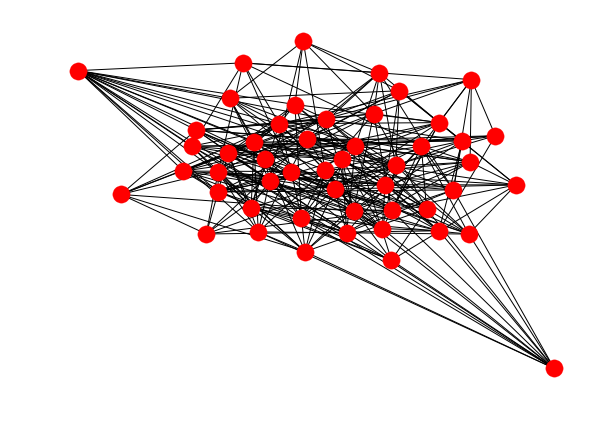

In [40]:
G = nx.gnp_random_graph(50, 0.25)

nx.draw(G)

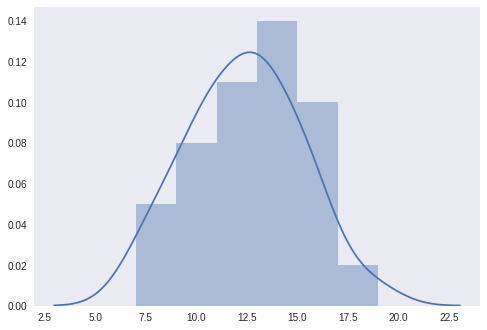

In [41]:
plot_degree_distribution(G)

### Watts-Strogatz

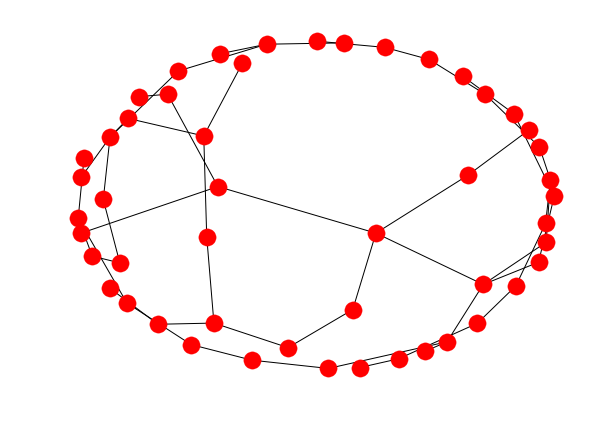

In [42]:
G = nx.watts_strogatz_graph(50, 2, 0.25)

nx.draw(G)

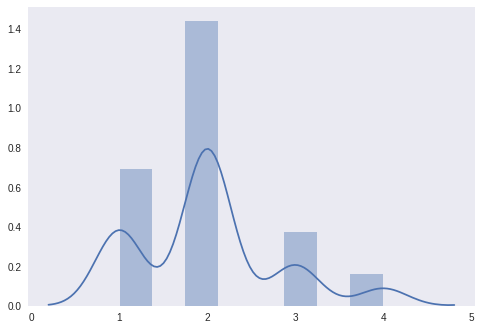

In [43]:
plot_degree_distribution(G)

### Barabási-Albert

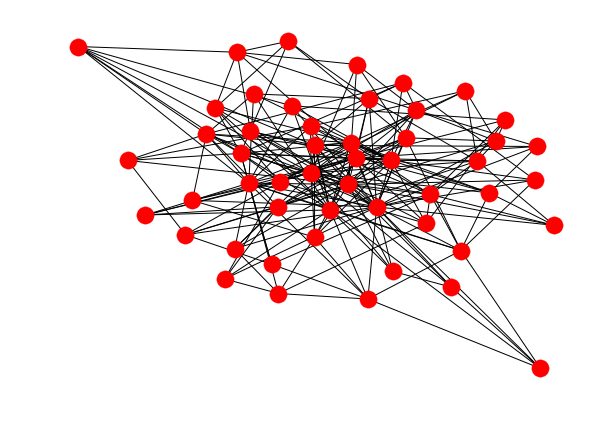

In [44]:
G = nx.barabasi_albert_graph(50, 5)

nx.draw(G)

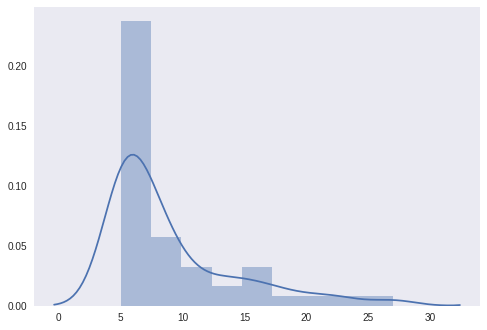

In [45]:
plot_degree_distribution(G)

## 3. Analyze a real-world graph dataset

The `networkx` library provides also [I/O functions for importing and exporting graphs with various formats](http://networkx.readthedocs.io/en/networkx-1.11/reference/readwrite.html).

Use the `networkx.read_graphml()` function to read a graph from file `starred.graphml`; it contains a (subset of) data from the UZH Science Cloud storage backend.

Answer these questions:

- what are the vertices with the top 2 degrees?
- are these vertices connected by a path?
- is the graph connected?
- compute the average degree, clustering coefficient, and characteristic path length; does this graph resemble any of the graphs/networks we have seen so far?
- what do the connected subgraphs look like?

In [64]:
G = nx.read_graphml('starred.graphml')

#### What are the vertices with the top 2 degrees?

Let us grab the list `nodes` of all vertices in `G` and the corresponding list of degrees `degs`.  Then we can find the maximum degree, and its index in `degs` will also be the index of the maximum-degree-node `a` in the list of vertices.

In [65]:
nodes = G.nodes()

In [66]:
degs = [G.degree(node) for node in nodes]

In [67]:
maxdeg1 = max(degs)

In [68]:
i = degs.index(maxdeg1)

In [69]:
a = nodes[i]

...and similarly we can find the vertex `b` which is second-to-maximum degree; just remove `a` and its corresponding degree value) from lists `nodes` and `degs` first, then proceed as before.

In [70]:
del degs[i]

In [71]:
del nodes[i]

In [72]:
maxdeg2 = max(degs)

In [73]:
j = degs.index(maxdeg2)

In [74]:
b = nodes[j]

#### Are these two vertices connected by a path?

In [75]:
nx.shortest_path_length(G, a, b)

NetworkXNoPath: No path between 2a69bac6-eb85-4054-ab92-8988ca3d068d_disk_clone_dab2d3a5026a44e9ad5c052efb27ce2c@snap and a0ac23b7-b16d-4250-bb62-9737440a3572_disk_clone_4998a64e80f34829bb3981c1c16accfe@snap.

#### Is the graph connected?

In [76]:
nx.is_connected(G)

False

In [77]:
A, B = nx.connected_components(G)

In [78]:
len(A), len(B)

(158, 193)

However, note that `nx.connected_components()` does *not* return graphs, it returns sets of vertices instead; to get sub-graphs (upon which we can operate with all usual `networkx` functions) we need to use `nx.connected_component_subgraphs`:

In [79]:
type(A)

set

In [80]:
A, B = nx.connected_component_subgraphs(G)

In [81]:
type(A)

networkx.classes.graph.Graph

#### Compute graph features for connected components

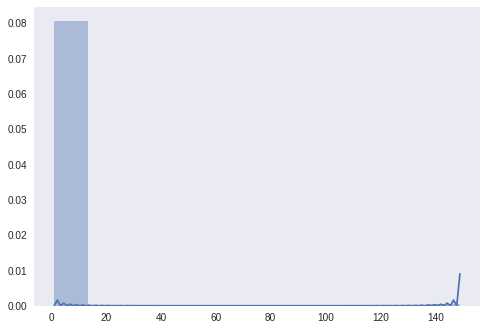

In [82]:
plot_degree_distribution(A)

In [83]:
print(clustering_coefficient(A), characteristic_path_length(A))

(0.0, 2.423687817463517)


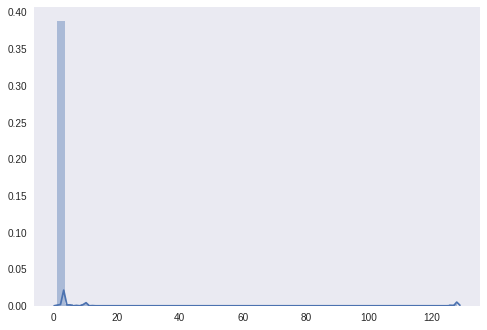

In [84]:
plot_degree_distribution(B)

In [85]:
print(clustering_coefficient(B), characteristic_path_length(B))

(0.0, 6.496113989637306)


#### What do the connected components look like?

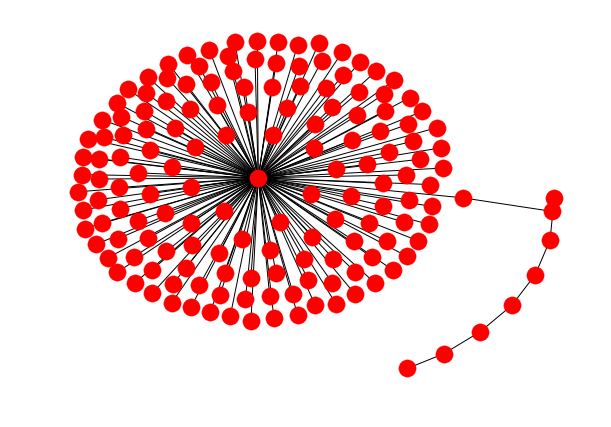

In [86]:
nx.draw(A)

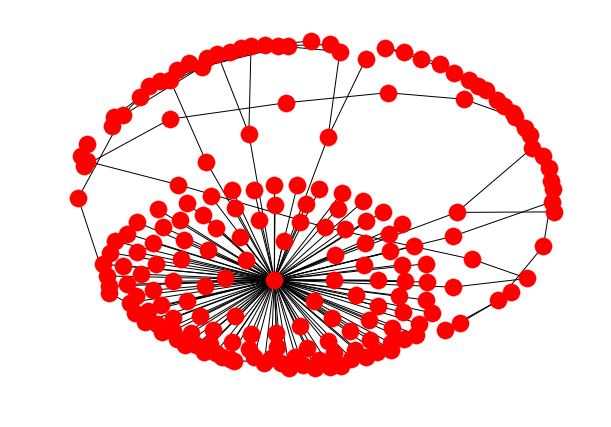

In [87]:
nx.draw(B)

## 3. Play the "Kevin Bacon" game!

**Warning:** Dataset is large, computations can take a loooong time and possibly crash the IPython kernel if done too naively. 

Connect to the `imdb` database on this server; define a graph thusly:

- actors are vertices
- two vertices are connected if the corresponding actors have starred in a movie together.

Plot the number of actors at distance $n=1,2,3$ from Kevin Bacon (named `Kevin Bacon (I)` in the `actors_r` table).

Actors and movie data are available from database `imdb` in tables `movies_r`, `actors_r`, and `starring_r`.  (The `*_r` tables only contain data for movies from 1990 to 2000; there are also `movie`, `actors`, and `starring` tables with the full IMDB dump -- 10x as large!)

In [88]:
%sql postgresql://rmurri@/imdb

u'Connected: rmurri@imdb'

In [89]:
%sql SELECT * FROM actors_r LIMIT 3;

3 rows affected.


id,name
26,Michael 'babeepower' Viera
34,Joseph 'Byron' Sese
60,José 'El Francés'


In [90]:
%sql SELECT * FROM actors_r WHERE name = 'Kevin Bacon (I)';

1 rows affected.


id,name
116637,Kevin Bacon (I)


In [91]:
%sql SELECT * FROM movies_r LIMIT 3;

3 rows affected.


id,title,year
31,Mixing Nia,1998
46,Mariano Mison... NBI,1997
79,Alma gitana,1996


In [92]:
%sql SELECT * FROM starring_r LIMIT 5;

5 rows affected.


actor_id,movie_id
2096811,16423
2046273,16423
1220103,16423
1220100,16423
1186033,16423


To get a table of co-starring actors, we can run a self-join of the `starring_r` table, with the condition that a pair of actor IDs is retained in the result if both have starred in the same movie. (And also add an ordering condition to avoid getting the same pair with reversed order, or self-loops.)

In [93]:
%%time

pairs = %sql SELECT l.actor_id, r.actor_id FROM starring_r AS l, starring_r AS r WHERE l.movie_id = r.movie_id AND l.actor_id < r.actor_id;

6968297 rows affected.
CPU times: user 22.1 s, sys: 1.14 s, total: 23.3 s
Wall time: 26.7 s


In [94]:
M = nx.Graph()

However, adding so many edges to the graph seems to crash the `networkx` library (and the IPython kernel with it, so **do not run the next cell unless you want to crash the kernel and start over again**).

In [ ]:
%%time

M.add_edges_from(pairs)

If we were able to construct the graph, `networkx.shortest_path_length()` would compute exactly the distance of every actor in the DB from Kevin Bacon:

In [ ]:
circles = nx.shortest_path_length(M, 116637)  # Kevin Bacon has id 116637, see above

We are going to try to compute the "circles" around Kevin Bacon using a naive Python implementation.

In [96]:
KEVIN_BACON_ID = 116637  # see above for SQL query where this comes from

In [97]:
circles = [ set([KEVIN_BACON_ID]) ]

Now scan the entire list of pairs for matches with Kevin Bacon's id with either the first or the second element in the pair of co-starring actors; add the other element in the pair to the circle of degree-1 connections.

In [23]:
%%time

outer_circle = circles[-1]
new_circle = set()
rest_pairs = []

for edge in pairs:
    if KEVIN_BACON_ID == edge[0]:
        other = edge[1]
    elif KEVIN_BACON_ID == edge[1]:
        other = edge[0]
    else:
        rest_pairs.append(edge)
    if other not in outer_circle:
        new_circle.add(other)

print("Inspected {} pairs,"
      " found {} distance {} connections,"
      " {} pairs still to go."
      .format(len(pairs), len(new_circle), len(circles), len(rest_pairs)))

pairs = rest_pairs
circles.append(new_circle)

Inspected 6968297 pairs, found 1288 level 1 connections, 6966799 pairs still to go.
CPU times: user 3.31 s, sys: 32 ms, total: 3.34 s
Wall time: 3.35 s


We can replace the equality test (e.g., `edge[0] == KEVIN_BACON_ID`) with a test that the edge endpoint is part of the degree-1 circle.  Python provides such a "contained in" test as part of the language (`edge[0] in circles[1]`); a less efficient way but one that allows better to see what is going to happen complexity- and time-wise is to run a loop over all actor IDs in the deg-1 circle and test for each of them to be the edge endpoint.  A ballpark estimate tells us that this would take about 1000$\times$ as much as the last test; indeed the code runs in about 25 minutes!

In [30]:
%%time

outer_circle = circles[-1]
new_circle = set()
rest_pairs = []

for edge in pairs:
    connected = False
    for person in outer_circle:
        if person == edge[0]:
            other = edge[1]
            connected = True
            break
        elif person == edge[1]:
            other = edge[0]
            connected = True
            break
    else:
        rest_pairs.append(edge)
    if connected and other not in outer_circle:
        new_circle.add(other)

print("Inspected {} pairs,"
      " found {} distance {} connections,"
      " {} pairs still to go."
      .format(len(pairs), len(new_circle), len(circles), len(rest_pairs)))

pairs = rest_pairs
circles.append(new_circle)

Inspected 6966799 pairs, found 63831 level 2 connections, 6460915 pairs still to go.
CPU times: user 24min 58s, sys: 3.14 ms, total: 24min 58s
Wall time: 25min


It is actually possible to perform the same computation using SQL only.

First, create an auxiliary table of co-starring actors (cf. the `pairs` variable above):

In [33]:
%sql CREATE TEMPORARY TABLE same_movie (id1 INTEGER, id2 INTEGER);

Done.


[]

In [34]:
%%time

%sql INSERT INTO same_movie SELECT l.actor_id, r.actor_id FROM starring_r AS l, starring_r AS r WHERE l.movie_id = r.movie_id AND l.actor_id < r.actor_id;

6968297 rows affected.
CPU times: user 2.35 ms, sys: 0 ns, total: 2.35 ms
Wall time: 4 s


[]

Then create another auxiliary table to hold the degree-1 connections (i.e., those pairs where Kevin Bacon appears in either slot of the tuple):

In [31]:
%sql CREATE TEMPORARY TABLE dist1(id INTEGER);

Done.
CPU times: user 1.71 ms, sys: 6 µs, total: 1.72 ms
Wall time: 169 ms


[]

In [35]:
%%time

%sql INSERT INTO dist1 (SELECT DISTINCT id1 FROM same_movie WHERE id2=116637 UNION SELECT DISTINCT id2 FROM same_movie WHERE id1=116637); 

1287 rows affected.
CPU times: user 2.13 ms, sys: 0 ns, total: 2.13 ms
Wall time: 1.43 s


[]

A similar query can compute the degree-2 circle; as SQL does not have a "contained in" operator, we have to emulate it with a table join (join co-starring actors and degree-1 circle, keep only actors whose mate is in the degree-1 circle; repeat for the other column of the co-starring table; SQL's `WITH` statement comes handy for this kind of repeated sub-queries). **Note how the full query takes less than 20 seconds.**

In [36]:
%sql CREATE TEMPORARY TABLE dist2(id INTEGER);

Done.


[]

In [40]:
%%time

%sql INSERT INTO dist2 (WITH connections AS (SELECT * FROM dist1) SELECT DISTINCT id1 FROM same_movie, connections WHERE id2=connections.id UNION SELECT DISTINCT id2 FROM same_movie, connections WHERE id1=connections.id); 

65120 rows affected.
CPU times: user 3.43 ms, sys: 0 ns, total: 3.43 ms
Wall time: 16.9 s


[]

Almost the same query works for degree-3; **note that the running time is approximately constant**

In [42]:
%sql CREATE TEMPORARY TABLE dist3(id INTEGER);

Done.


[]

In [43]:
%%time

%sql INSERT INTO dist3 (WITH connections AS (SELECT * FROM dist2) SELECT DISTINCT id1 FROM same_movie, connections WHERE id2=connections.id UNION SELECT DISTINCT id2 FROM same_movie, connections WHERE id1=connections.id); 

195598 rows affected.
CPU times: user 3.02 ms, sys: 0 ns, total: 3.02 ms
Wall time: 18.5 s


[]

The SQL `EXPLAIN` statement prints out the query plan, which gives an insight of how the DB server is going to actually execute the query.

In [44]:
%sql EXPLAIN INSERT INTO dist3 (WITH connections AS (SELECT * FROM dist2) SELECT DISTINCT id1 FROM same_movie, connections WHERE id2=connections.id UNION SELECT DISTINCT id2 FROM same_movie, connections WHERE id1=connections.id); 

25 rows affected.


QUERY PLAN
Insert on dist3 (cost=82372537.59..82372545.59 rows=400 width=4)
-> HashAggregate (cost=82372537.59..82372541.59 rows=400 width=4)
CTE connections
-> Seq Scan on dist2 (cost=0.00..982.60 rows=69360 width=4)
-> Append (cost=41185773.00..82371553.99 rows=400 width=4)
-> HashAggregate (cost=41185773.00..41185775.00 rows=200 width=4)
-> Merge Join (cost=1122779.16..35464894.30 rows=2288351477 width=4)
Merge Cond: (connections.id = same_movie.id2)
-> Sort (cost=7912.87..8086.27 rows=69360 width=4)
Sort Key: connections.id


The query time remains approximately constant for subsequent steps.  Repeating the procedure over and over again, one can find the following values for larger separation degrees:

<table>
  <tr>
    <th>$n$</th>
    <th>nr. of connections</th>
  </tr>
  <tr><td>4</td><td>238062</td></tr>
  <tr><td>5</td><td>243309</td></tr>
  <tr><td>6</td><td>244005</td></tr>
  <tr><td>7</td><td>244117</td></tr>
  <tr><td>8</td><td>244122</td></tr>
</table>

For larger values of $n$, the count stays fixed at 244122.

## 4. Characteristics of families of random graphs

**Optional:** This exercise might require some Python programming experience!

Make a plot of the three graph quantities *average vertex degree*, *clustering coefficient*, and *characteristic path length* for Erdös-Rényi graphs with $n=100$ vertices and probabilty $p$ of connecting two vertices (x-axis) ranging from 0 to 0.3 in steps of $0.3/20 = 0.015$. 

Nor make the same plots for the following graph families:

* Watts-Strogatz (aka Watts $\beta$-model) with $n=100$ vertices, $k=2$ connection to nearest neoghbors, and $p$ (on the x-axis) as for ER graphs
* Barabási-Albert graphs with $n=100$ final vertices and $m=1,...,99$ initial vertices (x-axis)

A couple auxiliary functions.

In [58]:
def compute_invariant_average(graph_constructor, invariant, repetitions=100):
    result = 0.0
    for _ in range(repetitions):
        graph = graph_constructor()
        result += invariant(graph)
    return (result / repetitions)

In [66]:
def plot_graph_invariants(constructor, params, invariants):
    values = np.empty([len(invariants), len(params)])

    for i, (inv_fn, name, color) in enumerate(invariants):
        for j, p in enumerate(params):
            values[i, j] = compute_invariant_average(constructor(p), inv_fn)

    fig, axes = plt.subplots(len(invariants))
    for i, (invariant, name, color) in enumerate(invariants):
        ax = axes[i]
        ys = values[i, :]
        ax.plot(params, ys, color=color, label=name)
        ax.set_ylim([0, np.max(ys)*1.20])
        ax.legend()
    return fig

In [57]:
invariants = [
    # function to compute        legend                        plot color
    (average_degree,             'Avg. Vertex Degree',         'blue'),
    (clustering_coefficient,     'Clustering Coefficient',     'red'),
    (characteristic_path_length, 'Characteristic Path Length', 'green')
]

CPU times: user 47.6 s, sys: 0 ns, total: 47.6 s
Wall time: 47.8 s


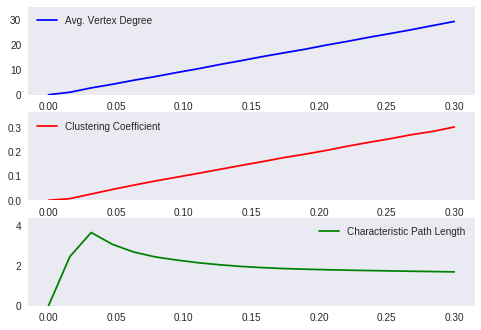

In [68]:
%%time

# nr. of vertices
n = 100

# range of probabilities to test
ps = np.linspace(0.0, 0.3, 20)

def erdos_renyi_graph(p):
    return (lambda: nx.gnp_random_graph(n, p))

plot_graph_invariants(erdos_renyi_graph, ps, invariants)

CPU times: user 19.8 s, sys: 7.84 ms, total: 19.8 s
Wall time: 19.8 s


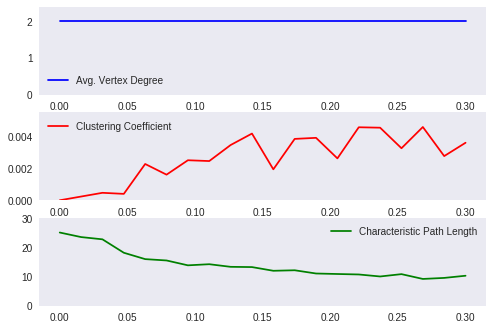

In [69]:
%%time

# nr. of vertices
n = 100

# nr. of connected nearest neighbors
k = 2

# range of probabilities to test
ps = np.linspace(0.0, 0.3, 20)

def watts_beta_graph(p):
    return (lambda: nx.watts_strogatz_graph(n, k, p))

plot_graph_invariants(watts_beta_graph, ps, invariants)

CPU times: user 1min 43s, sys: 35.3 ms, total: 1min 43s
Wall time: 1min 44s


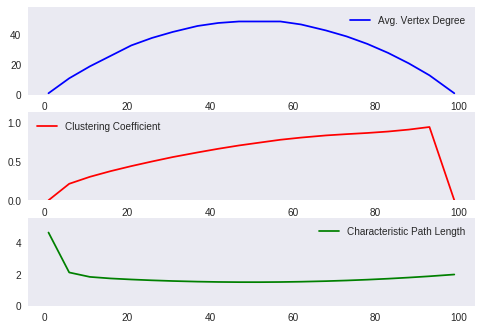

In [70]:
%%time

# nr. of vertices
n = 100

# range of attachment coefficients to test
ms = np.linspace(1, n-1, 20, dtype=np.integer)

def barabasi_albert_graph(m):
    return (lambda: nx.barabasi_albert_graph(n, m))

plot_graph_invariants(barabasi_albert_graph, ms, invariants)